Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation
metric to determine the optimal number of clusters in the dataset.
Note that this may not necessarily be two (edible versus not-edible).


Plot this metric while increasing the number of clusters, e.g.,  𝑘=2..30  (see here for an example).


working....
k = 2, score = 0.16223992558489375
k = 3, score = 0.21591966205500285
k = 4, score = 0.22500242403315623
k = 5, score = 0.25418714597264586
k = 6, score = 0.26975733675934394
k = 7, score = 0.27621495145138175
k = 8, score = 0.29058185563378547
k = 9, score = 0.29524050297881854
k = 10, score = 0.3004764852999812
k = 11, score = 0.24594171013443814
k = 12, score = 0.20040826725061206
k = 13, score = 0.19170232111832647
k = 14, score = 0.21023753800553666
k = 15, score = 0.15468669952205777
k = 16, score = 0.20394258424772674
k = 17, score = 0.13932307878077385
k = 18, score = 0.1615866833172006
k = 19, score = 0.13572003098477936


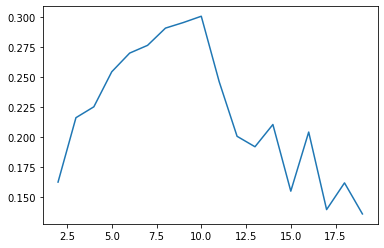

0.3004764852999812
10


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn import metrics


df = pd.read_csv('agaricus-lepiota.csv')
df_dummies = pd.get_dummies(df.drop('edibility', axis='columns'))


max_score = 0
scores = []
best_cluster_size = None


print('working....')
for i in range(2,20):
    k_means = KMeans(n_clusters=i)
    k_means.fit(df_dummies)
    cluster = k_means.predict(df_dummies)
    score = metrics.silhouette_score(df_dummies, cluster)
    scores.append(score)
    print(f"k = {i}, score = {score}")
    if(score > max_score):
        max_score = score
        best_cluster_size = i


plt.plot(range(2,20), scores)
plt.show()

print(max_score)
print(best_cluster_size)

Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

[8 7 7 ... 5 2 5]


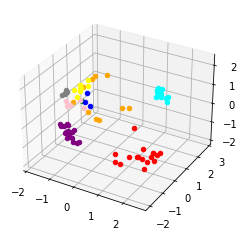

In [27]:
plt.close()

pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_dummies)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

k_means = KMeans(n_clusters=9)
k_means.fit(df_dummies)
clusters = k_means.predict(df_dummies)

colors = ['green',
          'blue',
          'red',
          'yellow',
          'cyan',
          'orange',
          'purple',
          'grey',
          'pink']
print(clusters)

for i, e in enumerate(df_pca):
    ax.scatter(*e, color=colors[clusters[i]])

plt.show()